# Building a YOLOv3 Object Detector with Darknet in the Cloud! (GPU ENABLED)
This tutorial will help you build YOLOv3 easily in the cloud with GPU enabled so that you can run real-time object detections as well as train your very own custom object detector!

# Step 2: Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

Do not worry about any warnings when you run the '!make' cell!

In [1]:
image_extensions = ['.tif', '.tiff', '.bmp', '.jpg', '.jpeg', '.gif', '.png', '.eps']

In [2]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15308, done.
remote: Total 15308 (delta 0), reused 0 (delta 0), pack-reused 15308
Receiving objects: 100% (15308/15308), 13.69 MiB | 18.18 MiB/s, done.
Resolving deltas: 100% (10406/10406), done.


In [3]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [4]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (build)
!make

In [6]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# make sure you are in the darknet folder to run the detections command!


[Errno 20] Not a directory: 'darknet'
/content/darknet


# Training a Custom YOLOv3 Object Detector in the Cloud!
Now comes the fun part! It is time to create your very own custom object detector, all within the cloud for free! The options are endless for what objects/classes you can make your detector detect. So think of something creative or just follow along with what I create. It is up to you!

**WOW! YOU ARE KILLING IT SO FAR!** 

This requires a couple tricks and tips so make sure to follow along closely with the rest of the tutorial.

In order to create a custom YOLOv3 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)


# Step 1: Gathering and Labeling a Custom Dataset


# Step 2: Moving Your Custom Dataset Into Your Cloud VM
So now that you have your dataset properly formatted to be used for training we need to move it into this cloud VM so that when it comes the time we can actually use it for training.

I recommend renaming the folder with your images and text files on your local machine to be called '**obj**' and then creating a .zip folder of the 'obj' folder. Then I recommend uploading the zip to your Google Drive. So you should now have obj.zip someplace in your Google drive. 

This will **greatly reduce** the time it takes to transfer our dataset into our cloud VM.

Now we can copy in the zip and unzip it on your cloud VM.

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /content/gdrive/MyDrive/yolov3

backup	obj.data  obj.names  obj.zip  yolov3-custom.cfg


In [ ]:
#make sure you are in darknet root directory..
!pwd

/content/darknet


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /content/gdrive/MyDrive/yolov3/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

# Step 3: Configuring Files for Training
This step involves properly configuring your custom .cfg file, obj.data, obj.names and train.txt file.

I have a detailed video on how to properly configure all four of these files to train a custom yolov3 detector. I will spare the time and ask you to watch the video in order to properly learn how to prepare the files.

You can access the video with this link! [Configuring YOLOv3 Files for Training](https://www.youtube.com/watch?v=zJDUhGL26iU&t=300s)

## i) Cfg File
Download the yolov3.cfg to system

edit the parameters and store it as yolov3-custom.cfg

and upload it to darknet/cfg and it should be along with yolov3.cfg

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

If you downloaded cfg to google drive you can use the built in  **Text Editor** by going to your google drive and double clicking on yolov3_custom.cfg and then clicking on the **Open with** drop down and selectin **Text Editor**.
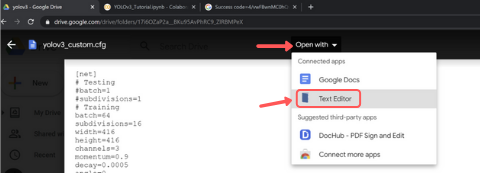

I recommend having **batch = 64** and **subdivisions = 16** for ultimate results. If you run into any issues then up subdivisions to 32.

Make the rest of the changes to the cfg based on how many classes you are training your detector on.

**Note:** I set my **max_batches = 10000**, **steps = 8000, 9000**, I changed the **classes = 5** in the three YOLO layers and **filters = 30** in the three convolutional layers before the YOLO layers. 

**Optional:** In each of the three yolo layers in the cfg, change one line from random = 1 to **random = 0** to speed up training but slightly reduce accuracy of model. Will also help save memory if you run into any memory issues.


In [13]:
!cp /content/gdrive/MyDrive/yolov3/yolov3-custom.cfg ./cfg

## ii) obj.names and obj.data 
Create a new file within a code or text editor called **obj.names** and you will make this file exactly the same as your classes.txt in the dataset generation step.

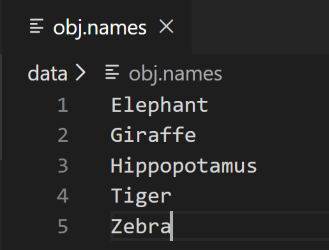

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

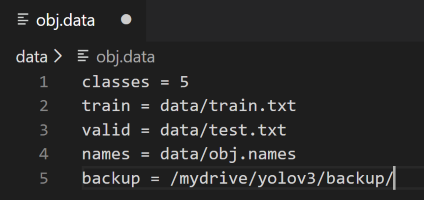



### create 2 files and upload them to drive/yolov3
and then copy to the darknet/data folder

In [14]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/gdrive/MyDrive/yolov3/obj.names ./data
!cp /content/gdrive/MyDrive/yolov3/obj.data  ./data


## iii) Generating train.txt
The last configuration file needed before we can begin to train our custom detector is the train.txt file which hold the relative paths to all our training images.(which are in darknet/data/obj)

In [ ]:
#Generate the train.txt such that it contains the path of each .jpg/.jpeg/.png image inside darknet/data/obj/*.png
#store all values in darknet/data/obj/train.txt
import os

image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(tuple(image_extensions)):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj		     person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.data	     scream.jpg
coco.names  goal.txt	 labels			   obj.names	     train.txt
dog.jpg     horses.jpg	 __MACOSX		   openimages.names  voc.names


If everything went as planned double click on **train.txt** on the left side File Explorer and it should look like this.
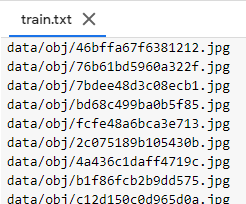

It will contain one line for each training image path.

# Step 4: Download pre-trained weights for the convolutional layers.
This step downloads the weights for the convolutional layers of the YOLOv3 network. By using these weights it helps your custom object detector to be way more accurate and not have to train as long. You don't have to use these weights but trust me it will help your modle converge and be accurate way faster. USE IT!

In [ ]:
# upload pretrained convolutional layer weights
# if rerunning after some epochs then get the weights from backup folder else if running for first time then run the below command
#!wget http://pjreddie.com/media/files/darknet53.conv.74

--2021-08-16 16:42:36--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2021-08-16 16:42:36--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  22.9MB/s    in 7.5s    

2021-08-16 16:42:44 (20.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# Step 5: Train Your Custom Object Detector!
The time has finally come! You have made it to the moment of truth! You are now ready to train your custom YOLOv3 object detector on whatever crazy classes you have decided on. So run the following command. (dont_show flag stops a chart from popping up since cloud can't open images on the spot)
```
!./darknet detector train <path to obj.data> <path to custom config> darknet53.conv.74 -dont_show
```
**TIP:** This training could take several hours depending on how many iterations you chose in the .cfg file. You will want to let this run as you sleep or go to work for the day, etc. However, Colab Cloud Service kicks you off it's VMs if you are idle for too long (30-90 mins).

To avoid this hold (CTRL + SHIFT + i) at the same time to open up the inspector view on your browser.

Paste the following code into your console window and hit **Enter**
```
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)
```
Looks like this, it will click the screen every 10 minutes so that you don't get kicked off for being idle! HACKS!

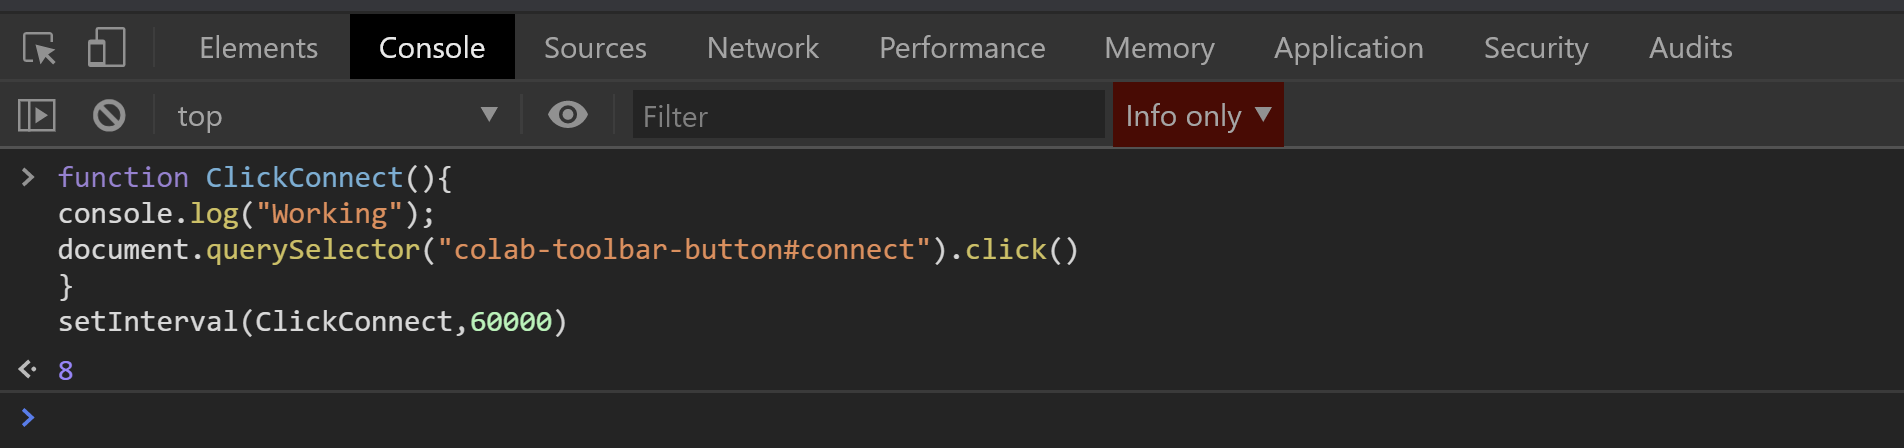

In [ ]:
# train your custom detector 
!./darknet detector train data/obj.data cfg/yolov3-custom.cfg /content/gdrive/MyDrive/yolov3/backup/yolov3-custom_last.weights -dont_show

You can observe a chart of how your model did throughout the training process by running the below command. It shows a chart of your average loss vs. iterations. For your model to be 'accurate' you would aim for a loss under 2.

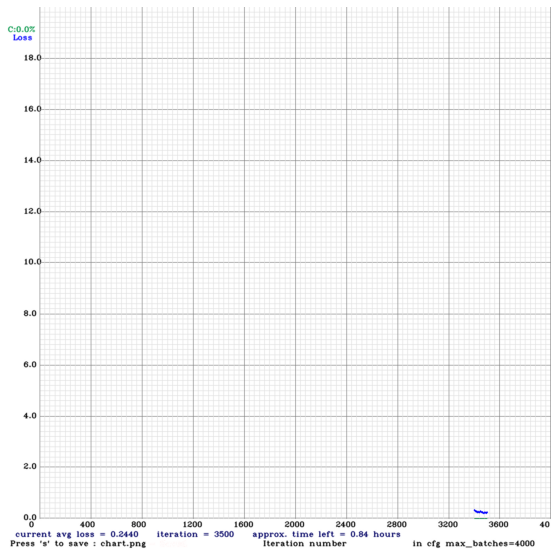

In [ ]:
imShow('chart.png')

**TRICK**: If for some reason you get an error or your Colab goes idle during training, you have not lost your weights! Every 100 iterations a weights file called **yolov3_custom_last.weights** is saved to **mydrive/yolov3/backup/** folder (wherever your backup folder is). This is why we created this folder in our Google drive and not on the cloud VM. If your runtime crashes and your backup folder was in your cloud VM you would lose your weights and your training progress.

We can kick off training from our last saved weights file so that we don't have to restart! WOOHOO! Just run the following command but with your backup location.
```
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show
```

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

# Step 6: Inferencing on the Test Images

In [8]:
# need to set our custom cfg to test mode 
#uncomment the #Test section in yolov3-custom.cfg
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-custom.cfg
%cd ..


/content/darknet/cfg
sed: can't read yolov3-custom.cfg: No such file or directory
sed: can't read yolov3-custom.cfg: No such file or directory
/content/darknet


## Step 6.1. Getting all test_images and storing their predictions in /content/gdrive/MyDrive/TEST_SET_YOLOV3/test_pred.json 

In [9]:
#store every test image path in a .txt file inside /content/gdrive/MyDrive/TEST_SET_YOLOV3/test_paths
#Different file types..
import glob

test_images_path = []
for files in image_extensions:
    test_images_path.extend(glob.glob(r"/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/*"+files))

In [ ]:
'''!./darknet detector test data/obj.data cfg/yolov3-custom.cfg \
/content/gdrive/MyDrive/yolov3/backup/yolov3-custom_last.weights \
/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test10.jpg
imShow('predictions.jpg')'''

In [10]:
test_images_path

['/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test1.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test2.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test5.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test6.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test7.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test8.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test9.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test10.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test11.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test12.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test14.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test17.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test18.jpg',
 '/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mt

In [ ]:
#os.chdir('..')
with open("/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_paths.txt", "w") as outfile:
    for image in test_images_path:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()

#os.chdir('/content/darknet')

In [ ]:
# store the predictions on test data in a json file inside /content/gdrive/MyDrive/TEST_SET_YOLOV3/test_pred.json
!./darknet detector test data/obj.data cfg/yolov3-custom.cfg \
/content/gdrive/MyDrive/yolov3/backup/yolov3-custom_last.weights \
 -ext_output -dont_show -out \
 /content/gdrive/MyDrive/TEST_SET_YOLOV3/test_pred.json < /content/gdrive/MyDrive/TEST_SET_YOLOV3/test_paths.txt


## Step 6.2. Reading the JSON file and for each test image converting the cordinates of ground truth bbox to (class_id(int) ,xmin,ymin,xmax,ymax) and the cordinates of predicted bboxes to (xmin, ymin, xmax, ymax, confidence_threshold, class_id)


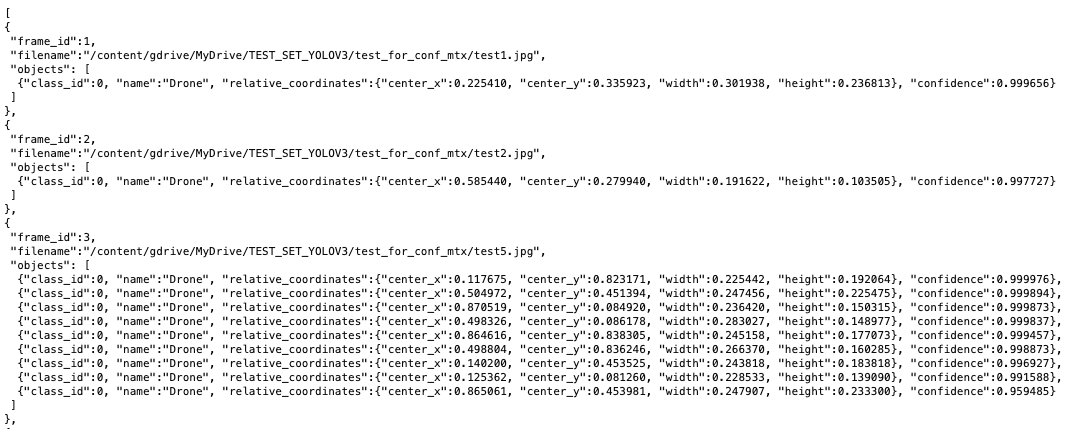

In [ ]:
from PIL import Image
Image.open('/content/Screenshot 2021-09-02 at 10.15.28 AM.png')

In [ ]:
import json

#Taking a json file and storing the 
def get_data(distros_dict):

    
    gt_bboxes = []  #Nx?x5 -- N-number of test images , #?-gt bboxes present in that image , 5- {class, xmin, ymin, xmax, ymax}
    pred_bboxes = [] #Nx?x6  --N - Number of test images , ?- bboxes predicted for an image , 6 -{ xmin, ymin, xmax, ymax, conf, class}

    # For every frame / every image
    for distro in distros_dict:
        #get the path of the test image in .jpg/.jpeg...
        filename = distro['filename']

        #get the Width and height of the test image..
        Image_Width, Image_Height = Image.open(filename).size
        
        #stores the ground truth bboxes and predicted bboxes 
        #for the given image..[[class,xmin,ymin,xmax,ymax],[...]]
        cur_img_gt_bboxes = []
        cur_img_pred_bboxes = []

        #Get the ground truth bounding boxes for the given image..
        #If the test image has path /content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test1.jpg
        #then its ground truth should be /content/gdrive/MyDrive/TEST_SET_YOLOV3/test_for_conf_mtx/test1.txt
        #in the same folder.
        annotation_file = filename[:filename.rindex('.')]+'.txt'

        #get each line from the .txt file and convert it into [class,xmin,ymin,xmax,ymax]
        #read each bbox line by line...
        #If there are no gt bboxes present in the image then append an empty list.
        file1 = open(annotation_file,'r')
        lines = file1.readlines() 

        #if there are some gt bounding boxes..
        if len(lines)!=0:
          #read each bounding box and store it..
          for line in lines: 
            temp1 = line
            templ = temp1.strip() #remove '\n'
            temp1 = temp1.split()

            class_of_bbox = int(temp1[0])
            xc_r = float(temp1[1])
            yc_r = float(temp1[2])
            wb_r = float(temp1[3])
            hb_r = float(temp1[4])

            xmin = int((xc_r - wb_r/2)*Image_Width)
            ymin = int((yc_r - hb_r/2)*Image_Height)
            xmax = int((xc_r+ wb_r/2)*Image_Width)
            ymax = int((yc_r+ hb_r/2)*Image_Height)
            

            cur_img_gt_bboxes.append([class_of_bbox, xmin, ymin, xmax, ymax])
          
          #if there are no ground truth bboxes then append an empty list..
        else :
          cur_img_gt_bboxes.append([])

        #collect the predicted bounding boxes for current image..
        

        #if there are some predicted bounding boxes for an image...
        if len(distro['objects']) != 0:
          # For every detection.
          for obj in range(len(distro['objects'])):
            # Get values.
            #frame_id = distro['frame_id']

            #get the class
            class_id = distro['objects'][obj]["class_id"]

            #get the xc_r
            xc_r = distro['objects'][obj]["relative_coordinates"]["center_x"]
            #get the yc_r
            yc_r = distro['objects'][obj]["relative_coordinates"]["center_y"]
            #get the wr
            wb_r = distro['objects'][obj]["relative_coordinates"]["width"]
            #get the hr
            hb_r = distro['objects'][obj]["relative_coordinates"]["height"]
            #get the prediction confidence
            confidence = distro['objects'][obj]["confidence"]

            xmin = int((xc_r - wb_r/2)*Image_Width)
            ymin = int((yc_r - hb_r/2)*Image_Height)
            xmax = int((xc_r+ wb_r/2)*Image_Width)
            ymax = int((yc_r+ hb_r/2)*Image_Height)
            
            # And save them.
            cur_img_pred_bboxes.append([xmin, ymin, xmax, ymax, confidence, class_id])

        #if there are no predicted bounding boxes then append an empty list..
        else :
          cur_img_pred_bboxes.append([])
        
        
        gt_bboxes.append(cur_img_gt_bboxes)
        pred_bboxes.append(cur_img_pred_bboxes)

    return (gt_bboxes , pred_bboxes)    


In [ ]:
#read the json file and pass it to function..

with open('/content/gdrive/MyDrive/TEST_SET_YOLOV3/test_pred.json', 'r') as f:
    distros_dict = json.load(f)

GT_BBOXES, PRED_BBOXES = get_data(distros_dict)

## Step 6.3 GT_BBOXES is (N, Y, 5) where
 N= number of test images
--
Y - number of gtruth bboxes in each image (may differ for each image)
--
5 - (class, x_min, y_min, x_max, y_max)
--
PRED_BBOXES is (M, Z, 6) where
--
M = number of test images
--
Z = number of predivted bboxes in each image
--
6 - (xmin, ymin, xmax, ymax, confidence_threshold, class_id)
--

## Step 6.4 We store the two matrices in to drive so that they can be used for confusion matrix calculation

In [ ]:
#convert the predictions and ground truth into numpy
import numpy as np
labels = np.array([np.array([np.array(xi) for xi in GT_BBOXES[i]]) for i in range(len(GT_BBOXES))])
detections = np.array([np.array([np.array(xi) for xi in PRED_BBOXES[i]]) for i in range(len(PRED_BBOXES))])

#save these into /content/gdrive/MyDrive/TEST_SET_YOLOV3/BBOXES/labels.npy and detections.npy 
with open('/content/gdrive/MyDrive/TEST_SET_YOLOV3/BBOXES/labels.npy', 'wb') as f:
    np.save(f, labels)

with open('/content/gdrive/MyDrive/TEST_SET_YOLOV3/BBOXES/detections.npy', 'wb') as f:
    np.save(f, detections)


 #to read it again
 '''
 with open('test.npy', 'rb') as f:
    a = np.load(f)
 '''   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.
